In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("twitter_training.csv", header=None, encoding='utf-8')
df.columns = ['id', 'topic', 'sentiment', 'tweet']
df = df.dropna(subset=['tweet'])

In [3]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (73996, 4)


,id,topic,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
def clean_text(text):
    text = text.lower()                            # Lowercase
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)          # Remove @mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)           # Remove numbers & punctuation
    text = re.sub(r'\s+', ' ', text).strip()       # Remove extra spaces
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)
df.head()

,id,topic,sentiment,tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


In [5]:
df = df[df['sentiment'].isin(['Positive', 'Negative', 'Neutral'])]
df['label'] = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

In [6]:
X = df['clean_tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (48896, 5000)


In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(metric='cosine')

In [9]:
y_pred = knn.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9129652351738241

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4472
           1       0.89      0.92      0.90      4131
           2       0.93      0.88      0.91      3622

    accuracy                           0.91     12225
   macro avg       0.91      0.91      0.91     12225
weighted avg       0.91      0.91      0.91     12225



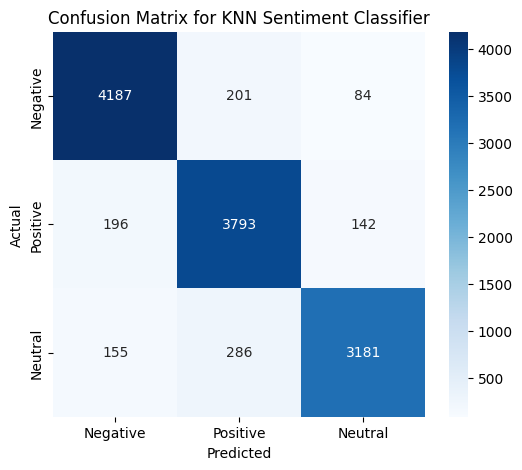

In [10]:
# Step 8: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title("Confusion Matrix for KNN Sentiment Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Step 9: Example Predictions
# ================================================
sample_tweets = [
    "I love this game! It's amazing.",
    "This is the worst update ever!",
    "Nothing special, just okay."
]
sample_tfidf = vectorizer.transform(sample_tweets)
preds = knn.predict(sample_tfidf)

for text, label in zip(sample_tweets, preds):
    sentiment = {1: "Positive", 0: "Negative", 2: "Neutral"}[label]
    print(f"{text} --> {sentiment}")

I love this game! It's amazing. --> Positive
This is the worst update ever! --> Negative
Nothing special, just okay. --> Positive
